In [1]:
import numpy as np
import pandas as pd
import keras

In [2]:
import matplotlib.pyplot as myplt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
df=pd.read_csv("NIFTY 50.csv")


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2724 non-null   object 
 1   Open         2724 non-null   float64
 2   High         2724 non-null   float64
 3   Low          2724 non-null   float64
 4   Close        2724 non-null   float64
 5   P/E          2724 non-null   float64
 6   P/B          2724 non-null   float64
 7   Div Yield %  2724 non-null   object 
dtypes: float64(6), object(2)
memory usage: 170.4+ KB


In [4]:
df.duplicated().sum()

0

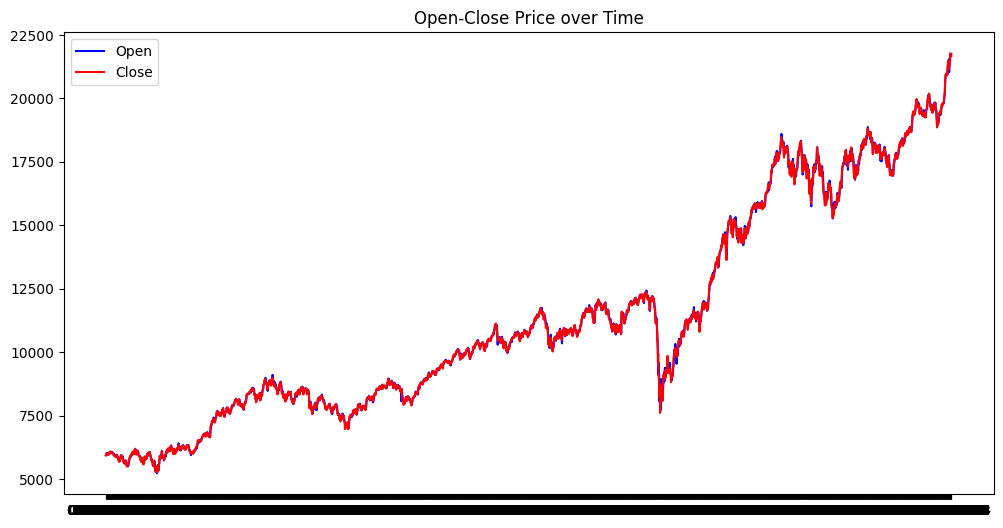

In [5]:
myplt.figure(figsize=(12,6))
myplt.plot(df['Date'], df['Open'], label="Open",color="blue")
myplt.plot(df['Date'], df['Close'], label="Close",color="red")
myplt.title("Open-Close Price over Time")
myplt.legend()

In [6]:
df['Date'] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df

,Date,Open,High,Low,Close,P/E,P/B,Div Yield %
0,2013-01-01,5937.65,5963.90,5935.20,5950.80,18.82,3.16,1.39
1,2013-01-02,5982.60,6006.05,5982.00,5993.20,18.96,3.18,1.38
2,2013-01-03,6015.80,6017.00,5986.55,6009.50,19.01,3.19,1.37
3,2013-01-04,6011.95,6020.75,5981.55,6016.10,19.03,3.19,1.37
4,2013-01-07,6042.15,6042.15,5977.15,5988.40,18.94,3.18,1.38
...,...,...,...,...,...,...,...,...
2719,2023-12-27,21497.65,21675.75,21495.80,21654.75,23.14,3.80,1.28
2720,2023-12-28,21715.00,21801.45,21678.00,21778.70,23.27,3.82,1.27
2721,2023-12-29,21737.65,21770.30,21676.90,21731.40,23.17,3.81,1.28
2722,2024-01-01,21727.75,21834.35,21680.85,21741.90,23.18,3.81,1.28


In [15]:
close_prices=df.reset_index()["Close"]
print(close_prices.shape)
close_prices


(2724,)


0        5950.80
1        5993.20
2        6009.50
3        6016.10
4        5988.40
          ...   
2719    21654.75
2720    21778.70
2721    21731.40
2722    21741.90
2723    21665.80
Name: Close, Length: 2724, dtype: float64

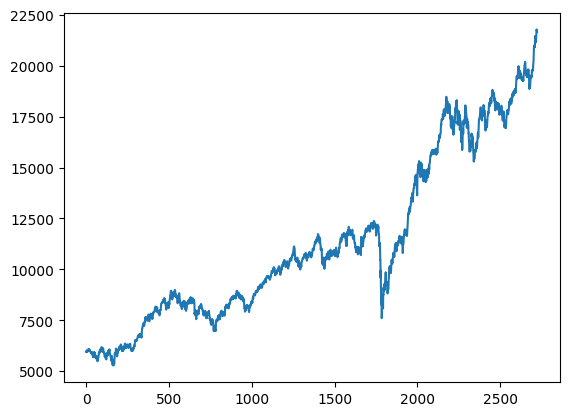

In [8]:
myplt.plot(close_prices)

In [9]:
data=df.sort_index(ascending=True, axis=0)
newdata=data[['Date','Close']].reset_index(drop=True)
newdata #with both date and close prices

,Date,Close
0,2013-01-01,5950.80
1,2013-01-02,5993.20
2,2013-01-03,6009.50
3,2013-01-04,6016.10
4,2013-01-07,5988.40
...,...,...
2719,2023-12-27,21654.75
2720,2023-12-28,21778.70
2721,2023-12-29,21731.40
2722,2024-01-01,21741.90


now i have three dataframes
1. all data - data
2. only close prices = close_prices
3. both date and close prices = newdata

In [17]:
scaler =MinMaxScaler(feature_range=(0,1))
close_prices=scaler.fit_transform(np.array(close_prices).reshape(-1,1))
print(close_prices.shape)
close_prices

(2724, 1)


array([[0.04036693],
       [0.04293761],
       [0.04392586],
       ...,
       [0.99713224],
       [0.99776885],
       [0.99315496]])

In [ ]:
train_size=int((len(close_prices))*0.7)
test_size = len(close_prices) - train_size
train_data, test_data = close_prices[0:train_size,:], close_prices[train_size:len(close_prices),:]

In [33]:
def window_sets(data,timesteps):
    dataX, dataY = [],[]
    for i in range(len(data)-timesteps-1):
        a = data[i:(i+timesteps),0]
        dataX.append(a)
        b= data[i+timesteps,0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [34]:
time_steps=60 #every 2 months
X_train, y_train = window_sets(train_data,time_steps)
X_test, y_test = window_sets(test_data,time_steps)


In [44]:
X_train.shape, y_train.shape

((1845, 60), (1845,))

In [49]:
#these value are 2 dimensions, thus convert it to 3 dimensions for LSTM model to process
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape, X_test.shape

((1845, 60, 1), (757, 60, 1))

In [91]:
#model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))


c:\Users\ggaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [94]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=30, batch_size=32)

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - loss: 0.0122 - val_loss: 8.5769e-04
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 3.5995e-04 - val_loss: 0.0014
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.5991e-04 - val_loss: 9.2778e-04
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.5987e-04 - val_loss: 0.0023
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.4760e-04 - val_loss: 0.0011
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 3.0152e-04 - val_loss: 9.3612e-04
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 3.2583e-04 - val_loss: 0.0033
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 1.7934e-04 - val_loss: 0.0027
Epoch 9/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 2.0499e-04 - val_loss: 0.0013
Epoch 10/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 2.0137e-04 - val_loss: 0.0016
Epoch 11/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - loss: 1.9764e-04 - val_loss: 0.0021
Epoch

In [95]:
from sklearn.metrics import root_mean_squared_error
predict_test_data= model.predict(X_test)
test_prediction= scaler.inverse_transform(predict_test_data)
root_mean_squared_error(y_test,test_prediction)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


17184.405445196866

In [97]:
predict_train_data= model.predict(X_train)
train_prediction= scaler.inverse_transform(predict_train_data)
root_mean_squared_error(y_train,train_prediction)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


9203.16925377202

In [113]:
len(X_train) +len(X_test)

2602

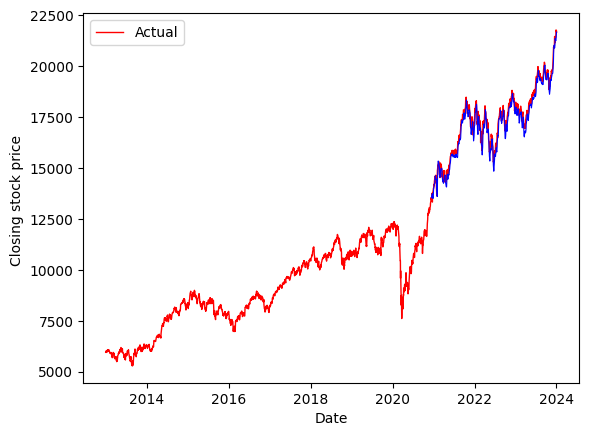

In [123]:
myplt.plot(df['Date'], df['Close'], label="Actual",color="red",linewidth=1)
testplot=np.empty_like(close_prices)
testplot[:,:] = np.nan
testplot[len(train_prediction)+(time_steps*2)+1:len(close_prices)-1,:]= test_prediction
myplt.plot(df['Date'],testplot,color="blue",linewidth=0.8)
myplt.xlabel("Date")
myplt.ylabel("Closing stock price ")
myplt.legend()